In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
co2 = pd.read_csv('../data/cleaned/co2_emissions_kt_by_country_clean.csv')
gdp = pd.read_csv('../data/cleaned/gdp_clean.csv')
temp_county = pd.read_csv('../data/cleaned/global_temperatures_by_country_2000_2009_cleaned.csv')

In [3]:
co2 = co2[(co2['year']>='2000-01-01') & (co2['year']<='2009-01-01')]
co2.head()

,country_code,country_name,year,co2_in_kt
40,ABW,Aruba,2000-01-01,2379.883
41,ABW,Aruba,2001-01-01,2409.219
42,ABW,Aruba,2002-01-01,2438.555
43,ABW,Aruba,2003-01-01,2563.233
44,ABW,Aruba,2004-01-01,2618.238


In [4]:
# find out the top 10 countries with the highest co2 emission in the years 2000-2010
co2rank = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False
)
#co2rank.head(50)

C:\Users\schue\AppData\Local\Temp\ipykernel_2044\3857256921.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2rank = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False


In [5]:
country_top10_co2 = ['China','United States','Russian Federation','India','Japan','Germany','Canada','United Kingdom','Korea, Rep.','Iran, Islamic Rep.']

In [6]:
co2_top10 = co2[co2['country_name'].isin(country_top10_co2)]
#co2_top10

In [7]:
co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)
#co2_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_2044\2476684700.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)


<Axes: xlabel='co2_in_kt', ylabel='country_name'>

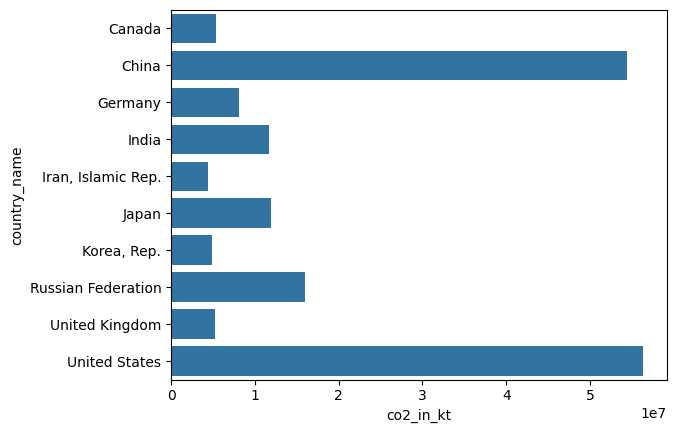

In [8]:
sns.barplot(data=co2_top10_pivot, y='country_name', x='co2_in_kt')

In [9]:
country_top10_co2

['China',
 'United States',
 'Russian Federation',
 'India',
 'Japan',
 'Germany',
 'Canada',
 'United Kingdom',
 'Korea, Rep.',
 'Iran, Islamic Rep.']

In [10]:
country_top10_temp = ['China','United States','Russia','India','Japan','Germany','Canada','United Kingdom','South Korea','Iran']

In [11]:
#temp_county['country'].unique()

In [12]:
temp_county_top10 = temp_county[temp_county['country'].isin(country_top10_temp)]
#temp_county_top10.head()

In [13]:
temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_2044\2006895314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])


In [14]:
temp_county_top10['year']= temp_county_top10['date'].dt.year
#temp_county_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_2044\2219317707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['year']= temp_county_top10['date'].dt.year


In [15]:
temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
#temp_county_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_2044\2087068505.py:1: FutureWarning: The provided callable <function mean at 0x00000213D23F3740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


In [16]:
list_of_row_index = temp_county_top10_pivot[temp_county_top10_pivot['year'].isin([2000,2009]) ==False].index.tolist()
temp_county_top10_pivot_dropyears = temp_county_top10_pivot.drop(list_of_row_index,axis=0)
#temp_county_top10_pivot_dropyears

In [17]:
temp_county_top10_diff = pd.pivot(temp_county_top10_pivot_dropyears, index='country', columns='year', values='average_temperature').reset_index()
#temp_county_top10_diff

In [18]:
temp_county_top10_diff.columns = ['country','2000','2009']
#temp_county_top10_diff

In [19]:
temp_county_top10_diff['temp_diff']=temp_county_top10_diff['2009']-temp_county_top10_diff['2000']
#temp_county_top10_diff

<Axes: xlabel='co2_in_kt', ylabel='country_name'>

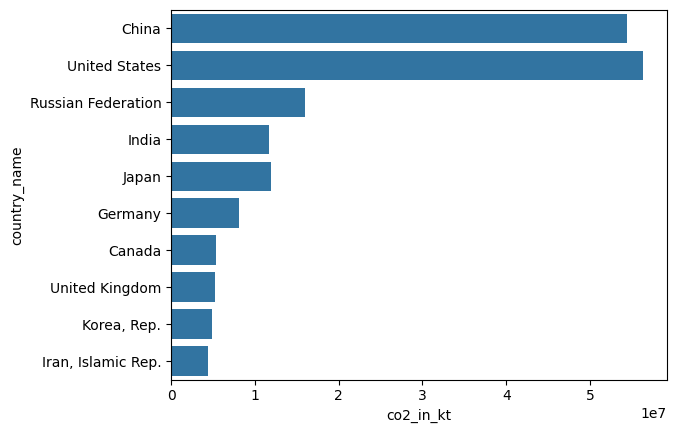

In [20]:
sns.barplot(data=co2_top10_pivot, y='country_name', x='co2_in_kt', order=country_top10_co2)

<Axes: xlabel='temp_diff', ylabel='country'>

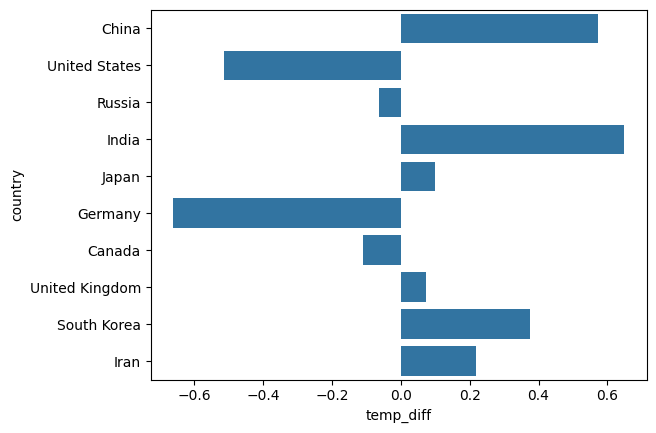

In [21]:
sns.barplot(data=temp_county_top10_diff, y='country', x='temp_diff', order=country_top10_temp)